In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import scipy.stats as stats

In [2]:
delivery = pd.read_csv("delivery.csv")
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


The delivery dataset is a data frame with 25 observations on the following 3 variables.

- __n.prod__: Number of Products stocked in a vending machine.
- __distance__: Distance traversed by the driver mechanism of the vending machine to dispense a soft drink.
- __delTime__: Time required to deliver(bottle) the soft drink.

Here, we shall try to predict the time taken by a vending machine to deliver a soft drink, based on the number of products stocked and the distance traversed by the route driver of the vending machine. We shall try to fit a linear regression model as given below.

$$ expecteddelTime = \beta_{0} + \beta_{1}(n.prod) + \beta_{2}(distance) + \epsilon $$

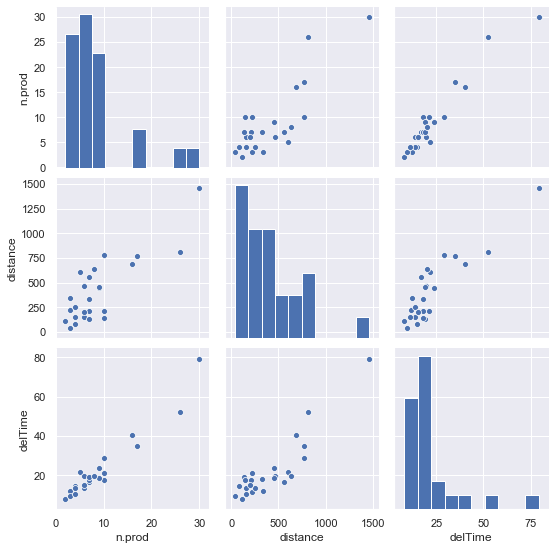

In [4]:
sns.pairplot(delivery)

We can observe, that the scatter plot matrix for the delivery time dataset shown above suggests a linear relationship among its variables – n.prod, distance and delTime.

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
X = delivery[['n.prod', 'distance']]
y = delivery['delTime']
model.fit(X,y)
print("Intercept: ", model.intercept_, "\nCoefficients:",model.coef_)

Intercept:  2.3412311451922 
Coefficients: [1.61590721 0.01438483]


Therefore the best fit model to predict the delivery time based on n.prod and distance can be expressed as

$$ expecteddelTime = 2.34123 + 1.61591(n.prod) + 0.01438(distance) + \epsilon   $$

### Visualizing Multiple Linear Regression Model



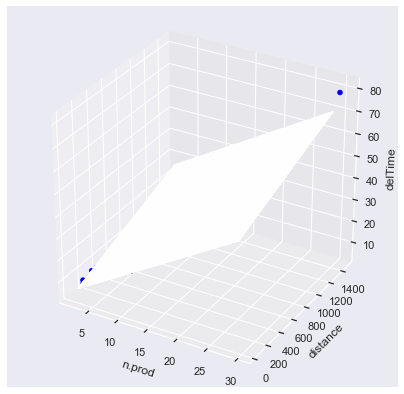

In [9]:
from mpl_toolkits.mplot3d import Axes3D
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)

## Assessing the best fit model

__The best fit model needs to be validated against the assumptions of linear regression before using the model for any statistical prediction.__ The assumptions which validate the use of the obtained best fit model are same as that listed earlier for simple linear regression.

[Validating the assumptions of linearity](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)

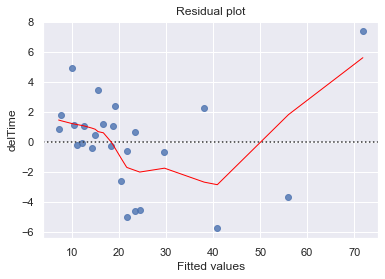

In [10]:
predictions = model.predict(delivery[["n.prod","distance"]])
sns.residplot(predictions.reshape(-1),'delTime', data=delivery,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values");
plt.title('Residual plot');

### Validating the Assumption of Normality

For the delivery time data set, the Q-Q plot and histogram of the residuals of the best fit model (shown below) indicates the adherence to normality assumption since the residual points are close to the normal line.

Text(0.5, 1.0, 'Normal Q-Q Plot')

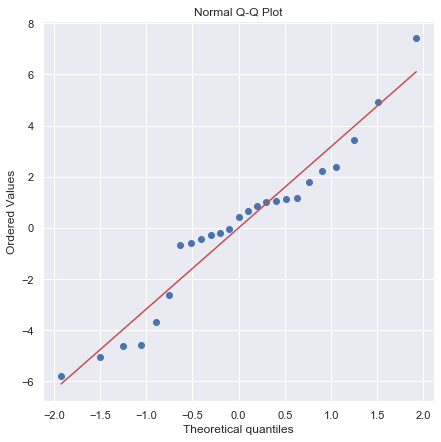

In [13]:
residuals = delivery["delTime"] - predictions.reshape(-1)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

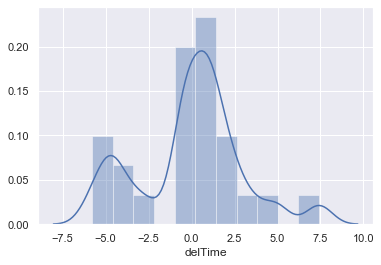

In [14]:
sns.distplot(residuals);

In [15]:
residuals.skew()

0.03364696226583834

In [16]:
residuals.kurt()

0.3747085116697835

### Validating the Assumption of Homoscedasticity

The scale location plot for the linear regression model shown below, suggests that the residuals of the best fit model are homoscedastic in nature since there seems to be no specific pattern.

Text(0.5, 0, 'Fitted value')

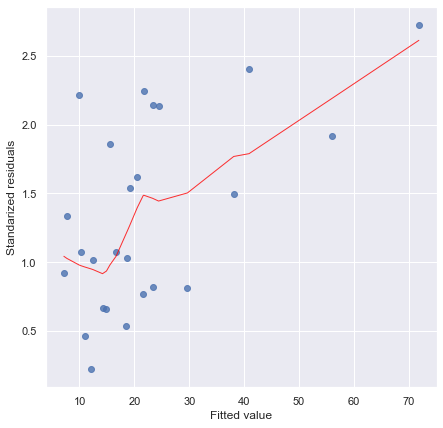

In [17]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

### Assumption of Independence

In a multiple regression model where two or more predictor variables are involved, it is possible that one predictor can be linearly predicted from the others, with a substantial degree of accuracy. In such a situation, the predictors are said to be highly correlated. In statistics, this phenomenon is called __multicollinearity__, or in other words __collinearity__. 

Due to collinearity, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. But, for a linear regression model to be valid it is essential that the predictors of the model be linearly independent of each other.

In case of the delivery time dataset, seen previously, the obtained best fit model 

$$ expecteddelTime = 2.34123 + 1.61591(n.prod) + 0.01438(distance) + \epsilon   $$

shall be valid only if the predictor variables (n.prod and distance) are linearly independent of each other.

The variables are suggested to be linearly dependent if the correlation values are close to 1.   
Hence, to determine the strength of linear relationship between the variables, correlation can be used


### Validating the Assumption of Independence Using VIF

In addition to correlation, we shall use a measure called __variance inflation factor(VIF)__ to determine if the predictor variables are independent of each other.

Variance inflation factor provides an extent of how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not related.

VIF is given as:

$$ VIF = \frac{1}{1-R_i^2} = \frac{1}{Tol(X_i)}$$

where tolerance given as- 

$$ Tol(X_i) = 1-R_i^2 $$

Reference: [Going Deeper into Regression Analysis with Assumptions, Plots & Solutions](https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/)

For the delivery time dataset the correlation among the variables n.prod and distance is as shown below.

In [18]:
np.corrcoef(delivery['n.prod'], delivery['distance'])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

VIF for the independent variables n.prod and distance can be computed as shown below.

[Variance Inflation Factor()VIF statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [21]:
#Adding a constant column for the intercept. 
X1 = add_constant(X)
X1.head()

,const,n.prod,distance
0,1.0,7,560
1,1.0,3,220
2,1.0,3,340
3,1.0,4,80
4,1.0,6,150


In [22]:
vif = pd.Series([variance_inflation_factor(X1.values,idx) 
           for idx in range(X1.shape[1])],
          index=X1.columns)
print(vif)

const       2.830380
n.prod      3.118474
distance    3.118474
dtype: float64


It can be observed that the VIF value 3.118474 (shown above) for the independent variables n.prod and distance is less than 10 suggesting that the best fit model

$$ expecteddelTime = 2.34123 + 1.61591(n.prod) + 0.01438(distance) + \epsilon   $$

It can be observed that the VIF value 3.118474 (shown above) for the independent variables n.prod and distance is less than 10 suggesting that the best fit model

__How to check__: 

You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

***

## Polynomial regression


Example dataset - from the dataset description, the volume of the tree is proportional to the squared of its girth as expressed below.

$$ Volume-of-trees  = Girth^2 $$

This suggests that using girth squared instead of girth might provide a better prediction of the volume of the tree.

#### Interpreting the obtained model

![](c_1.PNG)

![](c_2.PNG)

The generated non-linear regression model can be represented as

$$ Estimated-volume = 10.7863 - (2.0921*Girth) + (0.2545*Girth)^2 $$

#### Nonlinear regression model using only Girth ** 2

For a significance level of 0.05, the p-value for the obtained regression coefficients suggests that $\beta_0$ and $\beta_1$ are insignificant since their p-value is greater than the significance level.

This further suggests that the term $Girth^2$ alone could be a better predictor of volume, which is also ratified by the domain knowledge that volume is directly proportional to $Girth^2$.

Therefore the regression model that may be used to predict the volume of the tree based on $Girth^2$ can be expressed as shown below:

$$ Estimated-volume = \beta_0 + \beta_1*Girth^2 $$

The regression model to predict the volume based on Girth2 can be obtained as shown below.

```
import statsmodels.formula.api as smf
trees_polynomial_model_2_A = smf.ols(formula = 'Volumne ~ I(Girth ** 2)', data = trees).fit()
```

The summary of this regression model is as shown below.

![](c_3.PNG)

Thus the generated non-linear regression model can be represented as 

$$ Estimated-volume = -3.3551 + (0.1812*Girth)^2 $$

The R-Squared value for the obtained regression model suggests that approximately 95.9 % of variability in the volume can be explained by variability in the girth2 of the trees.

It can also be observed that the regression coefficients are significant for a significance level of 0.05 (since the obtained p-values are lesser than the chosen significance level).

The R2 value obtained for this model is approximately 0.02 more than the R2 obtained for the simple linear regression model

#### Visualizing the Obtained Non-Linear Regression Model

![](c_4.PNG)
***

